# 目的

假設兩標籤同時出現在一問題時，可用ㄧ edge 表示，用 graph 的觀點看標籤之間的關聯性。

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import seaborn as sns
import pickle
import networkx as  nx
import matplotlib.pyplot as plt

dir_in = "inputs/"
tag_dep = "clean_robotics.pkl"

In [13]:
def flat(hierachy):
    l = []
    for sublst in hierachy:
        for item in sublst:
            l.append(item)
    return l

def topNclose(connect, tag, N):
    taglink   = [item[1] for item in connect if item[0] == tag]
    tagweight = [item[2] for item in connect if item[0] == tag]
    
    sortedindex = np.argsort(tagweight)
    return [taglink[sortedindex[-i]] for i in xrange(N)]

In [14]:
with open(tag_dep, 'rb') as input:
    A = pickle.load(input)

B = []
for item in A:
    B.append((item[1], item[0], item[2]))

In [15]:
connect = flat([A, B])

In [16]:
connection = pd.DataFrame(connect, columns=['A', 'B', 'weight'])
connection['distance'] = connection.weight.apply(lambda w: 1./np.log(w))

In [22]:
plt.figure(figsize=(300, 200))
def draw_graph(connection, hotness_lb = 10, hotness_ub = 100000, spread = 1000.):
    cn = connection.copy()
    cn = cn[cn.weight >= hotness_lb]
    cn = cn[cn.weight <= hotness_ub]
    G = nx.DiGraph()
    for w in cn.weight.unique():
        G.add_edges_from(
            [(item[0], item[1]) for item in A if item[2] == w], weight=spread/w)

    edge_labels=dict([((u,v,),d['weight'])
                     for u,v,d in G.edges(data=True)])
    edge_colors = ['black' for edge in G.edges()]
    node_labels = {node:node for node in G.nodes()}
    black_edges = G.edges()

    pos = nx.spring_layout(G)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    #nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
    nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size=5)
    nx.draw_networkx_edges(G, pos, edgelist=black_edges, cmap=plt.get_cmap('jet'), edge_color='r', arrows=False)
    plt.show()

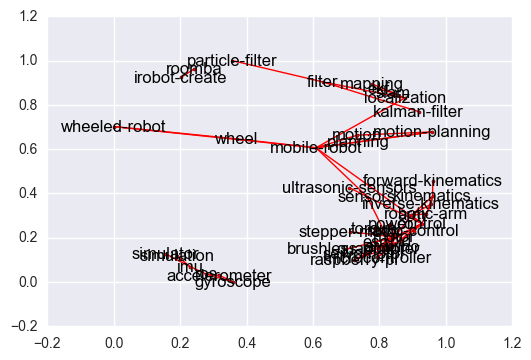

In [26]:
draw_graph(connection, hotness_lb=20)

In [148]:
connection[connection.A=='sas'].B.get_values()

array(['han', 'germany-schengen-visas', 'lin', 'nte', 'cur',
       'standard-visitor-visa', 'ala', 'france-schengen-visas', 'ind',
       'sport', 'euro', 'cruising', 'sin', 'romania', 'usa',
       'airport-transfer', 'international-travel', 'money', 'russia',
       'visas', 'china', 'us-citizens', 'cuba', 'hungary', 'europe',
       'air-travel', 'airports', 'south-africa', 'japan', 'uk', 'airlines',
       'israel', 'france', 'children', 'hong-kong', 'new-zealand',
       'vietnam', 'insurance', 'india', 'africa', 'eu', 'paris', 'denmark',
       'iran', 'pakistan', 'spain', 'malaysia', 'embassies', 'consulates',
       'italy', 'australia', 'work', 'regulations', 'georgia-country',
       'borders', 'passports', 'passport-stamps', 'study', 'ist', 'turkey',
       'visas-on-arrival', 'paperwork', 'greece',
       'customs-and-immigration', 'canada', 'bulgaria', 'germany',
       'poland', 'london', 'mexico', 'cambodia', 'switzerland', 'taiwan',
       'legal', 'uk-citizens', 'thai

In [54]:
def tag_distance(connection, tagA, tagB, level=0):
    
    linktag = connection[connection.A==tagA].B.get_values()
    disttag = connection[connection.A==tagA].distance.get_values()
    
    for i in xrange(len(linktag)):
        if tagB == linktag[i]:
            return disttag[i]
        
    if level < 1:
        return np.min(disttag + [tag_distance(connection, tag, tagB, level+1) for tag in linktag])
    else:
        return np.inf

In [55]:
tag_distance(connection, 'attack', 'rsa')

0.22820491141866869

In [169]:
connection[connection.distance>1]

,A,B,weight,distance
1,caribbean,vacations,1,inf
2,caribbean,guides,1,inf
3,caribbean,routes,1,inf
6,caribbean,taxis,1,inf
7,caribbean,public-transport,1,inf
8,caribbean,safety,1,inf
9,caribbean,international-travel,1,inf
10,caribbean,exchange,1,inf
11,caribbean,visas,1,inf
14,caribbean,europe,1,inf
